# **Python Setup**

**Dependencies**

In [38]:
# Import Packages

# Image Plotting Packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Math Packages
import numpy as np
import cv2

# File System Packages
import os
from google.colab import files

# Download image from the web
import requests

**Function Setup**

In [39]:
# Displays an image, converts BGR to RGB
def display_img(a, title = "Original"):
    a = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)
    plt.imshow(a), plt.title(title)
    plt.show()

# Displays an BGR image
def display_img_bw(a, title = "Original"):
    plt.imshow(a, cmap='gray'), plt.title(title)
    plt.show()

def normalize(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

# **Camera Exposure**


# **Light**

Are A and B the same color/value?

<img src='https://drive.google.com/uc?id=1T3QApn7A_bVkVdsWaSGAyhXl4lHmmaAM' height='400'>

###### **Answer**

Yes

<img src='https://drive.google.com/uc?id=10b4GkwZcNtaUh4cRRommHzrfA1qZktKX' height='400'> </br>
Credit: https://www.businessballs.com/amusement-stress-relief/shadow-optical-illusion/
<img src='https://images.squarespace-cdn.com/content/v1/5b2009bfb27e39b1217d09a1/1546596834092-AD4NW115VVTUNDDPVLB6/ke17ZwdGBToddI8pDm48kK702SnbJdKyB8Wh8F3AQFpZw-zPPgdn4jUwVcJE1ZvWEtT5uBSRWt4vQZAgTJucoTqqXjS3CfNDSuuf31e0tVG8j3RgFvkJrz13hDJIsqBko_fdZJFQMuKl7u3QXtl7kT-3CTWZQ124CTRPXn-dnvM/greyanim.gif?format=1000w' height='400'></br>
Credit: https://www.deanodell.co.uk/blog-list/adelsons-checkershadow-illusion-152

Why do you think this is?

## **Computer Brightness vs Human Brightness**



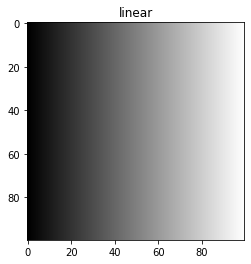

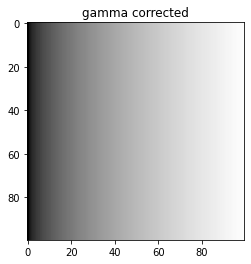

In [45]:
rampl = np.linspace(0, 1, 100)
rampl = np.tile(np.transpose(rampl), (100,1))
rampl = cv2.merge([rampl,rampl,rampl])

# build a lookup table mapping the pixel values [0, 255] to
# their adjusted gamma values
invGamma = 1/2.2
table = np.array([((i / 255.0) ** invGamma) * 255
  for i in np.arange(0, 256)]).astype("uint8")
# apply gamma correction using the lookup table
ramplog = cv2.LUT((255 * rampl).astype(np.uint8), table)

display_img_bw(rampl, title='linear')
display_img_bw(ramplog, title='gamma corrected')

# **Histograms**

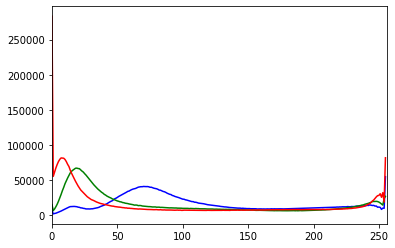

In [41]:
img = cv2.imread('DnbzPIhU0AA-GEN.jpg')
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

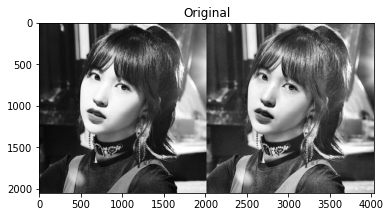

In [42]:
img = cv2.imread('DnbzPIhU0AA-GEN.jpg', 0)

# Adaptive Histogram Equalization
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(img)
res = np.hstack((img,cl1))
display_img_bgr(res)

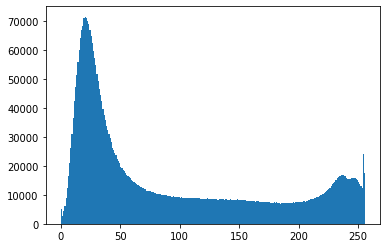

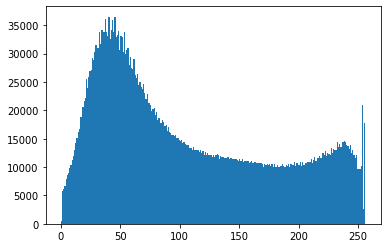

In [43]:
plt.hist(img.ravel(),256,[0,256]); plt.show()
plt.hist(cl1.ravel(),256,[0,256]); plt.show()

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Stone_Street_at_night_in_2018.png/1280px-Stone_Street_at_night_in_2018.png' style="float:right;height=300;">

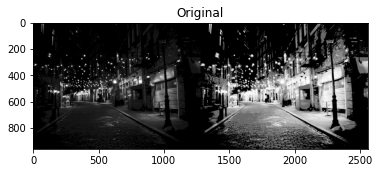

In [44]:
img_data = requests.get('https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Stone_Street_at_night_in_2018.png/1280px-Stone_Street_at_night_in_2018.png').content
with open('night.jpg', 'wb') as handler:
    handler.write(img_data)
    night = cv2.imread('night.jpg', 0)

equ = cv2.equalizeHist(night)
res = np.hstack((night,equ)) #stacking images side-by-side
display_img_bgr(res)